<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 37px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  Machine Learning<br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
  -<br>
  </div> 
  
<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 35px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      Illustration with Random Forests<br><br>
  </div> 

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 25px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      <font color=orange> 2 - Data preprocessing </font>
  </div>

<div style="font-variant: small-caps; 
      font-weight: normal; 
      font-size: 20px; 
      text-align: center; 
      padding: 15px; 
      margin: 10px;">
      BSc - Fall 2024
  </div>

## Data Preprocessing

-  [About the dataset and Kaggle](#about)<br>
-  [Load the data](#load_data)<br>
-  [Look at the data](#look_data)<br>
-  [Look at the columns](#look_columns)<br>
-  [Variable to predict](#output_variable)<br>
-  [Naive first model training](#naive_training)<br>
-  [Convert date times](#convert_date)<br>
-  [Convert strings into numerotated categories](#convert_strings)<br>
-  [Inspect missing values](#nans)<br>
-  [Save preprocessed data](#save_data)<br>
-  [Fully numericalize data](#numericalize_data)<br>



### Imports

In [1]:
# base modules
import os
import sys
import copy

# for manipulating data
import numpy as np
import pandas as pd

# for unzipping dataset
import zipfile

In [2]:
# path to repo
# path_to_repo = os.path.dirname(os.getcwd())
path_to_repo = os.path.dirname(os.path.dirname(os.path.realpath('__file__')))

sys.path.insert(0, os.path.join(path_to_repo, 'src'))

In [3]:
from mlpcourse.utils import *

# custom module

In [4]:
path_to_bulldozers = os.path.join(path_to_repo, "data", "bulldozers", "")
path_to_bulldozers

'/Users/jiaokan/Workshop/Machine Learning in Practice/data/bulldozers/'

# Data preprocessing

[Back to top](#plan)

### $\bullet$ About the dataset and Kaggle

[Back to top](#plan)

We will be looking at the Blue Book for Bulldozers Kaggle Competition: "The goal of the contest is to predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuration.  The data is sourced from auction result postings and includes information on usage and equipment configurations."

This is a very common type of dataset and prediciton problem, and similar to what you may see in your project or workplace.

Kaggle is an awesome resource for aspiring data scientists or anyone looking to improve their machine learning skills.  There is nothing like being able to get hands-on practice and receiving real-time feedback to help you improve your skills.

Kaggle provides:

1. Interesting data sets
2. Feedback on how you're doing
3. A leader board to see what's good, what's possible, and what's state-of-art.
4. Blog posts by winning contestants share useful tips and techniques.



Kaggle provides info about some of the fields of our dataset; on the [Kaggle Data info](https://www.kaggle.com/c/bluebook-for-bulldozers/data) page they say the following:

For this competition, you are predicting the sale price of bulldozers sold at auctions. The data for this competition is split into three parts:

- **Train.csv** is the training set, which contains data through the end of 2011.
- **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012. You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
- **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

### $\bullet$ Import the data

[Back to top](#plan)

In [5]:
# chose one of the equivalent
path_to_datasets = os.path.join(path_to_bulldozers, 'Train.csv')
print(path_to_datasets)

path_to_zip_data = '{}Train.zip'.format(path_to_bulldozers)
print(path_to_zip_data)

/Users/jiaokan/Workshop/Machine Learning in Practice/data/bulldozers/Train.csv
/Users/jiaokan/Workshop/Machine Learning in Practice/data/bulldozers/Train.zip


In [6]:
df_raw = pd.read_csv(path_to_datasets, low_memory=False,
                     parse_dates=["saledate"])

### $\bullet$ Look at the data

[Back to top](#plan)

In any sort of data science work, it's **important to look at your data**, to make sure you understand the format, how it's stored, what type of values it holds, etc.<br> 
Even if you've read descriptions about your data, the actual data may not be what you expect.

The key fields that are in train.csv are:

- SalesID: the unique identifier of the sale
- MachineID: the unique identifier of a machine.  A machine can be sold multiple times
- saleprice: what the machine sold for at auction (only provided in train.csv)
- saledate: the date of the sale

In [7]:
# df_raw.head(3)

### $\bullet$ Look at the columns

[Back to top](#plan)

In [8]:
# df_raw.columns

In [9]:
# len(df_raw.columns)

In [10]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000):
        display(df)

In [11]:
df_raw.shape

(401125, 53)

In [12]:
display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000,57000,10000,38500,11000
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [13]:
display_all(df_raw.describe(include='all').T)

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
SalesID,401125.0,NaN,NaN,NaN,1919712.521503,1139246.0,1418371.0,1639422.0,2242707.0,6333342.0,909021.492667
SalePrice,401125.0,NaN,NaN,NaN,31099.712848,4750.0,14500.0,24000.0,40000.0,142000.0,23036.898502
MachineID,401125.0,NaN,NaN,NaN,1217902.517971,0.0,1088697.0,1279490.0,1468067.0,2486330.0,440991.954249
ModelID,401125.0,NaN,NaN,NaN,6889.70298,28.0,3259.0,4604.0,8724.0,37198.0,6221.777842
datasource,401125.0,NaN,NaN,NaN,134.66581,121.0,132.0,132.0,136.0,172.0,8.962237
auctioneerID,380989.0,NaN,NaN,NaN,6.55604,0.0,1.0,2.0,4.0,99.0,16.976779
YearMade,401125.0,NaN,NaN,NaN,1899.156901,1000.0,1985.0,1995.0,2000.0,2013.0,291.797469
MachineHoursCurrentMeter,142765.0,NaN,NaN,NaN,3457.955353,0.0,0.0,0.0,3025.0,2483300.0,27590.256413
UsageBand,69639,3,Medium,33985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
saledate,401125,NaN,NaN,NaN,2004-08-02 07:47:13.986413184,1989-01-17 00:00:00,2000-10-07 00:00:00,2006-03-23 00:00:00,2009-03-24 00:00:00,2011-12-30 00:00:00,NaN


<a id="output_variable"></a>

### $\bullet$ Variable to predict

[Back to top](#plan)

The variable we want to predict is the sale price of a bulldozer, based on its description. This means that we seek to **predict** values within the _SalePrice_ column of the dataset, by using the other columns as **expainatory variables** for prediction.

It's important to note what metric is being used for a project. Generally, selecting the metric(s) is an important part of the project setup. However, in this case Kaggle tells us what metric to use: RMSLE (root mean squared log error) between the actual and predicted auction prices. Therefore we take the log of the prices, so that RMSE will give us what we need.

In [14]:
df_raw.SalePrice = np.log(df_raw.SalePrice)

### $\bullet$ Naive first model training

[Back to top](#plan)

In [15]:
from sklearn.ensemble import RandomForestRegressor

In [16]:
m = RandomForestRegressor(n_jobs=-1)

In [17]:
# The following code is supposed to fail due to string values in the input data
# m.fit(df_raw.drop('SalePrice', axis = 1), df_raw.SalePrice)

This dataset contains a mix of **continuous** and **categorical** variables.

The following method extracts particular date fields from a complete datetime for the purpose of constructing categoricals.  You should always consider this feature extraction step when working with date-time. Without expanding your date-time into these additional fields, you can't capture any trend/cyclical behavior as a function of time at any of these granularities.

### $\bullet$ Convert date times

[Back to top](#plan)

In [18]:
# add_datepart adds new columns to the dataframe, INPLACE
add_datepart(df_raw, 'saledate')

### $\bullet$ Convert strings into numerotated categories

[Back to top](#plan)

The categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. Therefore we call `train_cats` to convert strings to pandas categories.

In [19]:
df_raw.UsageBand = df_raw.UsageBand.astype('category')

We can specify the order to use for categorical variables if we wish:

In [20]:
df_raw.UsageBand.cat.categories.tolist()

['High', 'Low', 'Medium']

In [21]:
df_raw.UsageBand = df_raw.UsageBand.cat.set_categories(
    ['Low', 'Medium', 'High'], ordered=True)

Normally, pandas will continue displaying the text categories, while treating them as numerical data internally. Optionally, we can replace the text categories with numbers, which will make this variable non-categorical, like so:.

In [22]:
df_raw = df_raw.apply(lambda col: col.astype('category')
                      if (col.dtype == 'object' or col.dtype == 'string') else col)

### $\bullet$ Inspect missing values

[Back to top](#plan)

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest.

In [23]:
display_all(df_raw.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,11.09741,10.950807,9.21034,10.558414,9.305651
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
fiModelDesc,521D,950FII,226,PC120-6E,S175


### $\bullet$ Save preprocessed data

[Back to top](#plan)

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

### $\bullet$ Fully numericalize data

[Back to top](#plan)

In the future we can simply read it from this fast format.

We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable.

In [24]:
df, y, nas = proc_df(df_raw, 'SalePrice')

In [25]:
df.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries', 'fiModelDescriptor',
       'ProductSize', 'fiProductClassDesc', 'state', 'ProductGroup',
       'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type',
       'Ride_Control', 'Stick', 'Transmission', 'Turbocharged',
       'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower',
       'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control',
       'Tire_Size', 'Coupler', 'Coupler_System', 'Grouser_Tracks',
       'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width',
       'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type',
       'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls', 'saleYear', 'saleMonth',
       'saleWeek', 'saleDay', 'saleDayofweek', 'saleDayofyear',
       'saleI

In [26]:
display_all(df.head().T)

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,1,1,3,3,2
fiModelDesc,950,1725,331,3674,4208
fiBaseModel,296,527,110,1375,1529


In [27]:
y

array([11.09741002, 10.95080655,  9.21034037, ...,  9.35010231,
        9.10497986,  8.95544812])

In [28]:
nas

{'auctioneerID': np.float64(2.0), 'MachineHoursCurrentMeter': np.float64(0.0)}

We now have something we can pass to a random forest!

In [59]:
df_raw.to_feather(os.path.join(path_to_bulldozers, 'bulldozers-raw'))

[Back to top](#plan)

# Machine Learning

[Back to top](#plan)

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [30]:
df_raw.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,Low,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,Low,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,High,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,High,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,Medium,S175,...,23,3,204,False,False,False,False,False,False,1248307200


In [31]:
target_column = "SalePrice"

X = df
y = y

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [32]:
# rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model = RandomForestRegressor(n_jobs=-1)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(n_jobs=-1)

In [33]:
rf_model.score(X_train_scaled, y_train)

0.9876185965101119

In [34]:
feature_importance = pd.DataFrame(
    {"feature": X.columns, "importance": rf_model.feature_importances_}
).sort_values("importance", ascending=False)

feature_importance.style.format({"importance": "{:.4f}"}).background_gradient(
    cmap="coolwarm"
)

,feature,importance
37,Coupler_System,0.2024
5,YearMade,0.1728
13,ProductSize,0.1073
14,fiProductClassDesc,0.1058
2,ModelID,0.0913
63,saleElapsed,0.0777
19,Enclosure,0.0367
8,fiModelDesc,0.0307
10,fiSecondaryDesc,0.0264
0,SalesID,0.0253


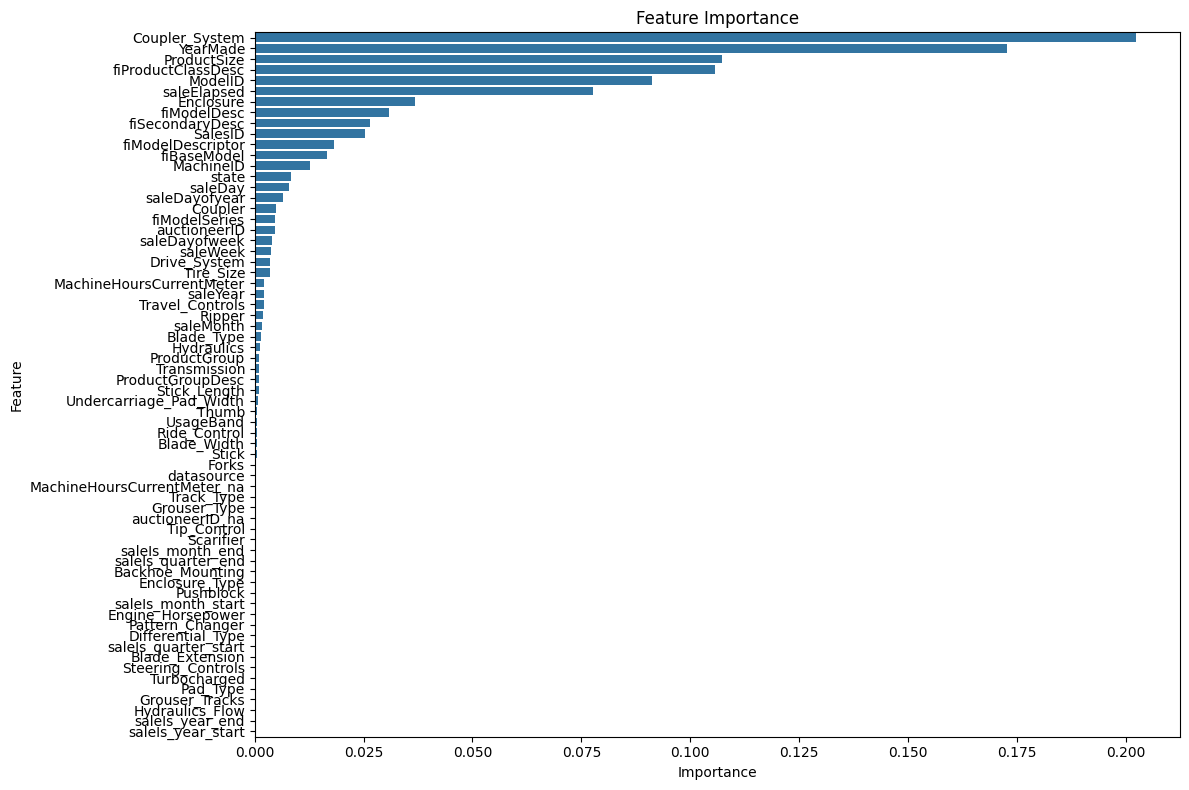

In [35]:
plt.figure(figsize=(12, 8))
sns.barplot(x="importance", y="feature", data=feature_importance)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

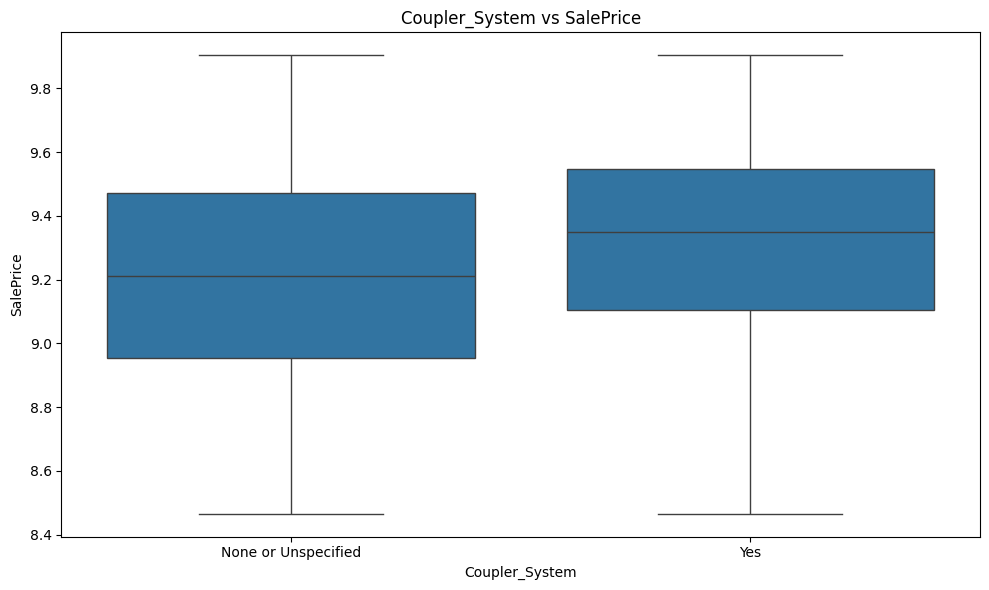

In [58]:
most_important_feature = feature_importance.sort_values(
    by="importance", ascending=False).iloc[0]['feature']

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw, x=most_important_feature, y=target_column)
plt.title(f"{most_important_feature} vs {target_column}")
plt.tight_layout()
plt.show()